In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [2]:
DATAFOLDER = Path("..\\data")
FIGSFOLDER = Path("..\\figures")
FIGSFOLDER = Path("C:\\Users\\jmc010\\Dropbox\\Publications in Progress\\IPP Giulia paper\\figs")

def tweak_df(df, session="s4"):

    return (df
            .query("session == @session")
            )

df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 1")
df = tweak_df(df)

In [3]:
def get_licks_per_solution(row):
    filename = row.medfile
    # print(f"Processing {filename}")

    L, R = tp.medfilereader(DATAFOLDER / filename, vars_to_extract=["b", "e"], remove_var_header=True)

    if "malt" in row.bottleL and "cas" in row.bottleR:
        med_var_malt, med_var_casein = L, R
    elif "malt" in row.bottleR and "cas" in row.bottleL:
        med_var_malt, med_var_casein = R, L
    else:
        raise ValueError("Bottles not found")
    
    return med_var_casein, med_var_malt

def get_pref_per_session(df):

    NR_pref, PR_pref = [], []
    
    for idx, row in df.query("dietgroup == 'NR'").iterrows():
        cas_licks, malt_licks = get_licks_per_solution(row)
        
        NR_pref.append(len(cas_licks) / (len(cas_licks) + len(malt_licks)))
    
    for idx, row in df.query("dietgroup == 'PR'").iterrows():
        cas_licks, malt_licks = get_licks_per_solution(row)
        
        PR_pref.append(len(cas_licks) / (len(cas_licks) + len(malt_licks)))
        
    print(len(NR_pref), len(PR_pref))

    return NR_pref, PR_pref

In [5]:
# loop through each session getting data and plotting
# preference first and then palatability measurements

NR_pref_all, PR_pref_all = [], []
for session in ["s4", "s5", "s6", "s7", "s8"]:
    df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 1")
    df = tweak_df(df, session=session)
    
    NR_pref, PR_pref = get_pref_per_session(df)
    
    NR_pref_all.append(NR_pref)
    PR_pref_all.append(PR_pref)
    
NR_pref_all = np.array(NR_pref_all)
PR_pref_all = np.array(PR_pref_all)
    

14 14
14 14
14 14
14 14
14 14


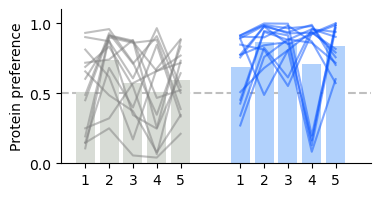

In [6]:
f, ax = plt.subplots(figsize=(4, 2))

NRx = np.arange(1, 6)
PRx = np.arange(7.5, 12.5)

ax.bar(NRx, np.mean(NR_pref_all, axis=1), color="xkcd:light gray", label="NR")
ax.bar(PRx, np.mean(PR_pref_all, axis=1), color="xkcd:powder blue", label="PR")

# ax.boxplot(NR_pref_all.T, positions=NRx, widths=0.5, patch_artist=True, boxprops=dict(facecolor="gray"))
# ax.boxplot(PR_pref_all.T, positions=PRx, widths=0.5, patch_artist=True, boxprops=dict(facecolor="xkcd:electric blue"))

for i in range(np.shape(NR_pref_all)[1]):
    ax.plot(NRx, NR_pref_all[:,i], linestyle="-", color="gray", alpha=0.5)
    ax.plot(PRx, PR_pref_all[:,i], linestyle="-", color="xkcd:electric blue", alpha=0.5)
    # a
    # ax.plot(PRx, PR_pref_all[i], "o", color="xkcd:electric blue", alpha=0.5)

ax.set_ylim(0, 1.1)
ax.set_yticks([0, 0.5, 1])
ax.set_ylabel("Protein preference")

ax.set_xticks([1,2,3,4,5,7.5,8.5,9.5,10.5,11.5],
              labels=[1,2,3,4,5,1,2,3,4,5])

ax.hlines(0.5, 0, 13, linestyle="--", color="gray", zorder=0, alpha=0.5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlim(0, 13)

f.savefig(FIGSFOLDER / "3A_protein_preference.pdf")


### Panel 3B

In [143]:
def get_clusters_per_session(df, dietgroup):

    cas_cluster_num, malt_cluster_num = [], []
    cas_cluster_size, malt_cluster_size = [], []
    
    for idx, row in df.query("dietgroup == @dietgroup").iterrows():
        cas_licks, malt_licks = get_licks_per_solution(row)
        
        cas_lickdata = tp.lickCalc(cas_licks, burstThreshold=0.5, minburstlength=3)
        malt_lickdata = tp.lickCalc(malt_licks, burstThreshold=0.5, minburstlength=3)
        
        cas_cluster_num.append(cas_lickdata["bNum"])
        cas_cluster_size.append(np.mean(cas_lickdata["bLicks"][1:-1]))
        
        malt_cluster_num.append(malt_lickdata["bNum"])
        malt_cluster_size.append(np.mean(malt_lickdata["bLicks"][1:-1]))

    return cas_cluster_num, malt_cluster_num, cas_cluster_size, malt_cluster_size

In [144]:
NR_cas_cluster_num, NR_malt_cluster_num = [], []
PR_cas_cluster_num, PR_malt_cluster_num = [], []
for session in ["s4", "s5", "s6", "s7", "s8"]:
    df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 1_backup")
    df = tweak_df(df, session=session)
    
    cas_cluster_num, malt_cluster_num, _, _ = get_clusters_per_session(df, "NR")
    
    NR_cas_cluster_num.append(cas_cluster_num)
    NR_malt_cluster_num.append(malt_cluster_num)
    
    cas_cluster_num, malt_cluster_num, _, _ = get_clusters_per_session(df, "PR")
    
    PR_cas_cluster_num.append(cas_cluster_num)
    PR_malt_cluster_num.append(malt_cluster_num)
    
NR_cas_cluster_num = np.array(NR_cas_cluster_num)
NR_malt_cluster_num = np.array(NR_malt_cluster_num)
PR_cas_cluster_num = np.array(PR_cas_cluster_num)
PR_malt_cluster_num = np.array(PR_malt_cluster_num)
    
    

c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\Miniconda3\lib\si

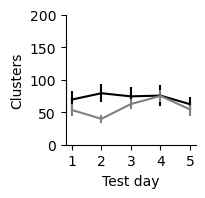

In [145]:
def sem(data, axis=0):
    return np.std(data, axis=axis) / np.sqrt(np.shape(data)[axis])

f, ax = plt.subplots(figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.95, "top": 0.9, "bottom": 0.25})

x = np.arange(1, 6)
ax.errorbar(x, np.mean(NR_cas_cluster_num, axis=1), yerr=sem(NR_cas_cluster_num, axis=1), color="black", label="Cas")
ax.errorbar(x, np.mean(NR_malt_cluster_num, axis=1), yerr=sem(NR_malt_cluster_num, axis=1), color="grey", label="Malt")

ax.set_ylim(0,200)
ax.set_xticks([1,2,3,4,5], labels=[1,2,3,4,5])
ax.set_ylabel("Clusters")
ax.set_xlabel("Test day")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig(FIGSFOLDER / "3B_NR_clusters.pdf")

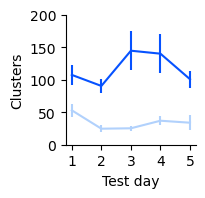

In [146]:
f, ax = plt.subplots(figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.95, "top": 0.9, "bottom": 0.25})

x = np.arange(1, 6)
ax.errorbar(x, np.mean(PR_cas_cluster_num, axis=1), yerr=sem(PR_cas_cluster_num, axis=1), color="xkcd:electric blue", label="Cas")
ax.errorbar(x, np.mean(PR_malt_cluster_num, axis=1), yerr=sem(PR_malt_cluster_num, axis=1), color="xkcd:powder blue", label="Malt")

ax.set_ylim(0,200)
ax.set_xticks([1,2,3,4,5], labels=[1,2,3,4,5])
ax.set_ylabel("Clusters")
ax.set_xlabel("Test day")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig(FIGSFOLDER / "3B_PR_clusters.pdf")

### Panel 3C

In [147]:
NR_cas_cluster_size, NR_malt_cluster_size = [], []
PR_cas_cluster_size, PR_malt_cluster_size = [], []
for session in ["s4", "s5", "s6", "s7", "s8"]:
    df = pd.read_excel(DATAFOLDER / "metafile_ipp.xlsx", sheet_name="metafile Exp 1_backup")
    df = tweak_df(df, session=session)
    
    _, _, cas_cluster_size, malt_cluster_size = get_clusters_per_session(df, "NR")
    
    NR_cas_cluster_size.append(cas_cluster_size)
    NR_malt_cluster_size.append(malt_cluster_size)
    
    _, _, cas_cluster_size, malt_cluster_size = get_clusters_per_session(df, "PR")
    
    PR_cas_cluster_size.append(cas_cluster_size)
    PR_malt_cluster_size.append(malt_cluster_size)
    
NR_cas_cluster_size = np.array(NR_cas_cluster_size)
NR_malt_cluster_size = np.array(NR_malt_cluster_size)
PR_cas_cluster_size = np.array(PR_cas_cluster_size)
PR_malt_cluster_size = np.array(PR_malt_cluster_size)

PR_malt_cluster_size = np.nan_to_num(PR_malt_cluster_size, nan=0.0)

c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\jmc010\Miniconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
c:\Users\jmc010\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jmc010\Miniconda3\lib\si

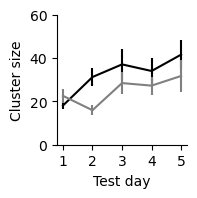

In [148]:
f, ax = plt.subplots(figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.95, "top": 0.9, "bottom": 0.25})

x = np.arange(1, 6)
ax.errorbar(x, np.mean(NR_cas_cluster_size, axis=1), yerr=sem(NR_cas_cluster_size, axis=1), color="black", label="Cas")
ax.errorbar(x, np.mean(NR_malt_cluster_size, axis=1), yerr=sem(NR_malt_cluster_size, axis=1), color="grey", label="Malt")

ax.set_ylim(0,60)
ax.set_xticks([1,2,3,4,5], labels=[1,2,3,4,5])
ax.set_ylabel("Cluster size")
ax.set_xlabel("Test day")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig(FIGSFOLDER / "3C_NR_cluster_size.pdf")

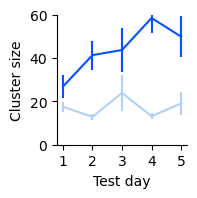

In [149]:
f, ax = plt.subplots(figsize=(2, 2),
                     gridspec_kw={"left": 0.3, "right": 0.95, "top": 0.9, "bottom": 0.25})

x = np.arange(1, 6)
ax.errorbar(x, np.mean(PR_cas_cluster_size, axis=1), yerr=sem(PR_cas_cluster_size, axis=1), color="xkcd:electric blue", label="Cas")
ax.errorbar(x, np.mean(PR_malt_cluster_size, axis=1), yerr=sem(PR_malt_cluster_size, axis=1), color="xkcd:powder blue", label="Malt")

ax.set_ylim(0,60)
ax.set_xticks([1,2,3,4,5], labels=[1,2,3,4,5])
ax.set_ylabel("Cluster size")
ax.set_xlabel("Test day")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig(FIGSFOLDER / "3C_PR_cluster_size.pdf")

In [126]:
PR_malt_cluster_size

array([[  8.94117647,  31.89130435,  19.5       ,  21.86363636,
         21.6       ,  19.93333333,  26.35483871,   8.07042254,
         14.12820513,  10.6       ,   7.18181818,  12.38311688,
         10.28571429,  32.45045045],
       [ 10.4       ,  14.        ,          nan,  20.16666667,
         13.14285714,  21.8       ,  18.48275862,  12.5       ,
         13.06      ,   9.15686275,  10.        ,  10.33333333,
         17.58695652,   9.77777778],
       [ 34.57142857,  21.14285714,          nan, 128.66666667,
         15.60606061,  37.76      ,  18.90566038,  12.5625    ,
          7.7       ,   7.        ,   8.52941176,  25.5       ,
          8.24390244,   8.625     ],
       [  4.        ,  23.70967742,  78.35185185,  17.34615385,
         18.        ,  76.95833333,  14.66666667,  23.09090909,
         10.61904762,   7.57831325,  11.15384615,   9.68571429,
         48.34567901,  92.34042553],
       [ 28.11764706,  34.5       ,   5.5       ,          nan,
         81.58333333